Please note that `empty_sequence` uses the KL divergence with Barnes-Hut approximation (angle=0.5) by default.
Generated points:
[[ 0.55997433  0.61146313]
 [ 0.38697251  0.37401433]
 [-0.21279589 -0.7961425 ]
 ...
 [-0.1998621   0.62902694]
 [-0.07976522 -0.27945621]
 [ 0.0015188   0.39789123]]
grid setup time: 0.03893756866455078 seconds
indices:
[10500 32845 45073 ... 86607 96649 99418]
starts, counts:
[     0      0      0      0      0      0      0      0      0      0
      0      8      8    109    117    209    326    291    617    310
    927    274   1201    269   1470    199   1669    117   1786      7
   1793      0   1793      0   1793      0   1793      0   1793      0
   1793      0   1793      0   1793      0   1793      0   1793     93
   1886    267   2153    301   2454    340   2794    361   3155    305
   3460    292   3752    337   4089    281   4370    309   4679    319
   4998     90   5088      0   5088      0   5088      0   5088      0
   5088      0   5088  

C:\Users\Milan\AppData\Local\Temp\ipykernel_14852\2343801328.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(points[:, 0], points[:, 1],
C:\Users\Milan\AppData\Local\Temp\ipykernel_14852\2343801328.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


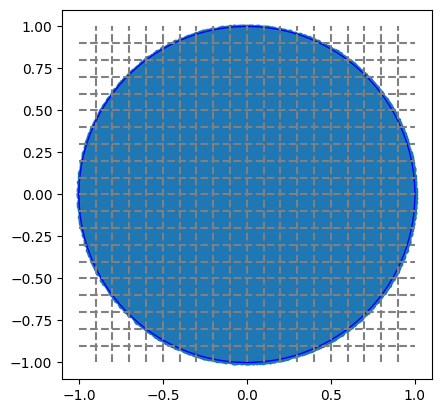

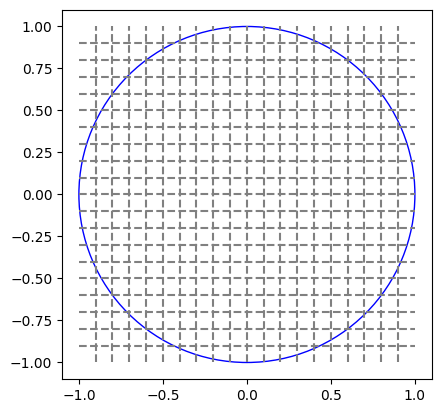

In [1]:
import hyperbolicTSNE.uniform_grid as grid
import numpy as np
from matplotlib import pyplot as plt
import time

def generate_points(n):
    points = []
    while len(points) < n:
        # Generate random x and y coordinates in the range (-1, 1)
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        
        # Check if the point is within the unit circle
        if x**2 + y**2 < 1:
            points.append([x, y])
    
    return np.array(points)

def plot_poincare(points, grid_size, labels=None):
    fig, ax = plt.subplots()
    

    ax.scatter(points[:, 0], points[:, 1],
               c=labels,
               marker=".",
               cmap="tab10")
    
    # Draw grid lines
    for i in range(1, grid_size):
        x = np.linspace(-1, 1, 100)
        y = np.ones_like(x) * (-1 + 2 * i / grid_size)
        ax.plot(x, y, color='gray', linestyle='--')
        ax.plot(y, x, color='gray', linestyle='--')

    ax.add_patch(plt.Circle((0, 0), radius=1, edgecolor="b", facecolor="None"))
    ax.axis("square")
    fig.show()
    #fig.savefig(f"results/{dataset.name}.png")

def get_points_in_grid(points, indices, starts_counts, grid_index):
    start = starts_counts[grid_index*2]
    stride = starts_counts[grid_index*2+1]
    return points[indices[start : start+stride]]

# Example usage:
n = 100000
points = generate_points(n)
print("Generated points:")
print(points)

grid_size = 10

start_time = time.time()

result_indices, result_starts_counts, max_distances = grid.divide_points_over_grid(points, grid_size)

end_time = time.time()

execution_time = end_time - start_time
print("grid setup time:", execution_time, "seconds")


#grid.divide_points_over_grid(points, grid_size)
print("indices:")
print(result_indices)
print("starts, counts:")
print(result_starts_counts)
print("max distances:")
print(max_distances)

plot_poincare(points, grid_size)
plot_poincare(get_points_in_grid(points, result_indices, result_starts_counts, 2), grid_size)
